<span style="font-size:9pt">Copyright Jean-Luc CHARLES (Jean-Luc.charles@ensam.eu) 2022 CC BY-SA 4.0</span>

# Machine learning avec les modules Python tensorflow2/keras :

# Entraînement / exploitation d'un réseau de neurones dense pour la reconnaissance de chiffres manuscrits

version 3.0 du 10 octobre 2022

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
    Il est fondamental d'utiliser un <span style="font-weight:bold;">Environnement Virtuel Python</span> (EVP) pour chaque projet Python important : l'EVP permet de maîtriser pour chaque projet les versions de l'interpréteur Python et des modules "sensibles" (comme tensorflow par exemple).</span></div>

Les <i>notebooks</i> de l'APP-ML doivent être chargés dans un processus `jupyter notebook` lancé dans l'EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b> créé en suivant la procédure du document `Consignes.pdf`. Ils doivent être travaillés dans l'ordre :

- `ML1_MNIST.ipynb` : vérifier le bon fonctionnement de l’EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b>, charger et utiliser les données de la banque MNIST (images et labels).
- `ML2_DNN.ipynb` : construire un réseau dense, l’entraîner avec les données de la banque MNIST et afficher ses performances.
- `ML3_DNN_suite.ipynb` : charger un réseau dense entraîné et l’exploiter avec les données de test  MNIST.

**Le notebook `ML2_DNN.ipynb` doit être travaillé avant celui-ci.**

## Objectifs d'apprentissage visés :
- Savoir recharger la structure du réseau entraîné et ses poids
- Savoir exploiter le réseau entraîné rechargé avec la méthode `predict`
- Savoir afficher l amatrice de confusion.

## Import des modules Python
Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans le module **tensorflow** (tf) depuis la version 2. <br>
La documentation du module **tf.keras** à consulter pour cet APP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import matplotlib.pyplot as plt
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")

2022-10-11 10:32:52.214719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-11 10:32:52.214743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Python    : 3.8.13
tensorflow: 2.8.0 incluant keras 2.8.0
numpy     : 1.21.2
OpenCV    : 4.5.1


Incrustation des tracés matplotlib dans le notebook et import de modules utiles :

In [2]:
%matplotlib inline

# Rappel de la structure du réseau dense construit
- **couche d'entrée** : 784 valeurs comprises entre 0 et 1 (les pixels des image MNIST 28 $\times$ 28 mis sous forme d'un vecteur de 784 nombres `float` normalisés),
- **couche cachée** : 784 neurones utilisant la fonction d'activation `relu`,
- **couche de sortie** : 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux problèmes de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

## Travail à faire
### 1 - Charger et pré-traiter les données de test MNIST<br>2 - Recharger la structure du réseau entrainé et ses poids<br>3 - Exploiter le réseau entraîné : méthode predict<br>4 - Afficher la matrice de confusion


## 1 - Charger et pré-traiter les données de test MNIST

Le travail a été traité dans le *notebook* `ML1_MNIST.ipynb` :

In [3]:
# Charger les données du MNIST :
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# Définir les paramètres importants :
nb_im_test  = im_test.shape[0]     # nombre d'images de test 
nb_pixel    = im_test[0].size      # nombre d'éléments (des pixels) de la première image de test 
nb_classe   = len(set(lab_test))   # nombre de classe à identifier (les 10 chiffres de 0 à 9)

print(f"{nb_im_test} images de test")
print(f"{nb_pixel} pixels dans chaque image")
print(f"{nb_classe} classes à reconnaître (les chiffres de 0 à 9)")

# Mettre à plat et normaliser les matrices:
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

# 'one-hot' encoding' des labels :
from tensorflow.keras.utils import to_categorical
y_test  = to_categorical(lab_test)

10000 images de test
784 pixels dans chaque image
10 classes à reconnaître (les chiffres de 0 à 9)


## 2 - Recharger la structure du réseau entrainé et ses poids

La  méthode `load_model` de la classe `tf.keras.models` permet de recharger **la structure et les poids** d'un réseau entraîné.<br>
De cette façon, on peut remettre le réseau de neurone dans son état initial avant de commencer un entraînement :

In [4]:
import os

# définir le chemin d'accès du réseau entraîné dans le notebook précédent :
model_path = os.path.join('models', 'trained1_model')

# charger le réseau
model = tf.keras.models.load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Dense)                  (None, 784)               615440    
                                                                 
 C2 (Dense)                  (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


2022-10-11 10:32:54.896950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-11 10:32:54.896982: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-11 10:32:54.896999: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kong): /proc/driver/nvidia/version does not exist
2022-10-11 10:32:54.897208: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 3 - Exploiter le réseau entraîné : méthode `predict`

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict` :

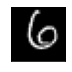

Inférence du réseau pour l'image n° 100 :
[5.5345422e-06 2.8186053e-08 2.2714516e-06 2.2498172e-08 8.6463405e-07
 7.8480080e-06 9.9998188e-01 2.2777760e-07 1.2931459e-06 2.2119014e-08]


In [5]:
i = 100  # numéro de l'image de test choisie

# afficher l'image :
from utils.tools import plot_images
plot_images(im_test,i,1,1) ; plt.show()

# inférence du réseau entrainé pour l'image choisie: 
rep = model.predict(x_test[i:i+1])      # Attention: x doit être un tableau de matrices...
                                        # => x[i] ne convient pas !

print(f"Inférence du réseau pour l'image n° {i} :\n{rep[0]}")

pour rendre plus lisible la sortie du réseau, on peut limiter à 2 chiffre après la virgule l'affichage du tableau numpy :

In [6]:
with np.printoptions(formatter={'float':'{:.2f}'.format}):    
    print(f"Inférence du réseau pour l'image n° {i} arrondie à 2 chiffre :\n{rep[0]}")

Inférence du réseau pour l'image n° 100 arrondie à 2 chiffre :
[0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


La méthode `argmax` des tableaux *ndarray* de *numpy* permet d'obtenir le rang de la valeur maximale :

In [7]:
print(f"Le label prédit par le réseau est rep[0].argmax() : {rep[0].argmax()}")
print(f"Le label associé à l'image choisie est lab_test[{i}] : {lab_test[i]}")

Le label prédit par le réseau est rep[0].argmax() : 6
Le label associé à l'image choisie est lab_test[100] : 6


### Utilité de la méthode `argmax` de numpy pour décoder le tableau de vecteurs *one-hot* renvoyé par la méthode `predict`

Quand on calcule une inférence du réseau `model` avec les images du tableau `x_test` par exemple, on obtient un résultat qui est un tableau de vecteurs *one-hot* :

In [8]:
results = model.predict(x_test)
print("forme du tableau 'results':", results.shape)
print("allure des vecteurs du tableau 'result' :")
with np.printoptions(formatter={'float':'{:.2f}'.format}): 
    print("results[0]  :", results[0])
    print("results[-1] :", results[-1])

forme du tableau 'results': (10000, 10)
allure des vecteurs du tableau 'result' :
results[0]  : [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
results[-1] : [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


Avec l'expression `results.argmax(axe=-1)`, on obtient le tableau des `argmax` de chaque vecteur $\leadsto$ c'est directement le tableau des chiffres reconnus par le réseau :

In [9]:
inferences = results.argmax(axis=-1)
print(f"inferences.shape: {inferences.shape}, inferences.dtype: {inferences.dtype}")
print(f"contenu du tableau inferences : {inferences}")

inferences.shape: (10000,), inferences.dtype: int64
contenu du tableau inferences : [7 2 1 ... 4 5 6]


On peut comparer le tableau `inférences` et le tableau `lab_test` avec l'operateur `==` (cela a un sens avec les tableaux *ndarray* du module *numpy*) :

In [10]:
inferences == lab_test

array([ True,  True,  True, ...,  True,  True,  True])

en comptant le nombre de `True` dans le résultat, on a directement le nombre d'inférences justes :

In [11]:
reponse_ok = (inferences == lab_test)
print(f"nombre de réponses justes : {reponse_ok.sum()} sur {nb_im_test} images de test")
precision = reponse_ok.sum()/nb_im_test*100
print(f"performance du réseau entraîné : {precision} % de réponses justes")

nombre de réponses justes : 9826 sur 10000 images de test
performance du réseau entraîné : 98.26 % de réponses justes


## 4 - Afficher la matrice de confusion

Le module `sklearn.metrics` propose la classe [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)  pour afficher la **matrice de confusion** sui permet de visualiser :
- sur la diagonale : les bonnes réponses du réseau, avec dans chaque case le nombre de bonnes réponses
- hors diagonale : les erreurs du réseau, avec dans chaque case la fréquence d'apparition de l'erreur.

La méthode [from_prediction](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) permet de construire la matrice de confusion en utilisant les *vrais* labels associés aux données de test et les inférences du réseau entraîné calculées pour les données de test.

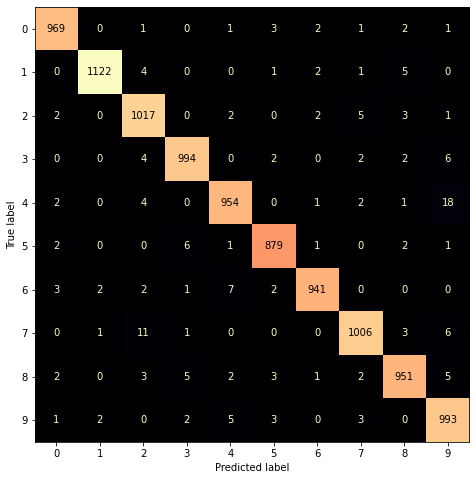

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(8,8))
axis = plt.axes()
ConfusionMatrixDisplay.from_predictions(lab_test, inferences, 
                                        ax=axis,
                                        display_labels=[str(i) for i in range(10)], 
                                        #xticks_rotation='vertical',
                                        cmap='magma',
                                        colorbar=False)


# Autres ressources intéressantes... des vidéos :

In [13]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [14]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [15]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [16]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>